## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question.
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question.
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions.
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions.
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions.
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions.
- **last_word_eq**: 1 if the last word in the two questions is the same, 0 otherwise.
- **first_word_eq**: 1 if the first word in the two questions is the same, 0 otherwise.

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words).
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words).
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question.

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy.
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy.
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy.
- **token_set_ratio**: token_set_ratio from fuzzywuzzy.


In [1]:
!pip install pandas seaborn matplotlib scikit-learn beautifulsoup4 nltk distance fuzzywuzzy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('questions.csv').sample(10000)
print(df.shape)
df.head()

(10000, 6)


,id,qid1,qid2,question1,question2,is_duplicate
136591,136591,270438,270439,How do you differentiate between a Boeing and ...,What is the difference between an Airbus and B...,1
392780,392780,767665,767666,Why is my boyfriend so selfish?,How can I be a little less selfish and underst...,0
148079,148079,292974,292975,What are some cool things to do on command pro...,What are some awesome trics in command prompt?,0
165599,165599,327323,327324,"I'm 8 days late for my period, Am I pregnant?",Am 4 days late of my period date.Am I pregnent?,1
313852,313852,615976,615977,Can I now download movies from torrentz2?,"""I am a lover of women""…What exactly does this...",0


In [4]:
print(df.isnull().sum())
print('--------------------')
df.dropna(axis=0,inplace=True)
print(df.isnull().sum())

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64
--------------------
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


In [5]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    6289
1    3711
Name: count, dtype: int64
is_duplicate
0    62.89
1    37.11
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

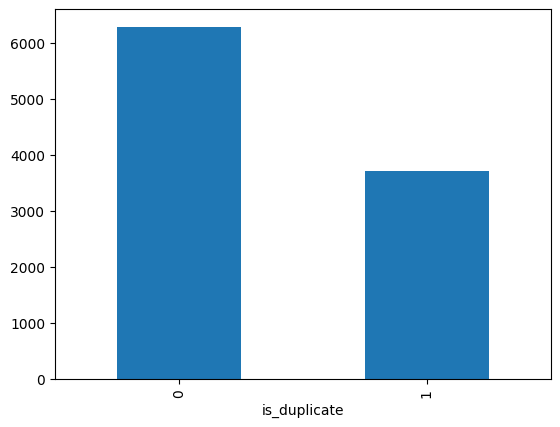

In [6]:
# check imbalance

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
from bs4 import BeautifulSoup
import re

In [8]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [9]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [10]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
136591,136591,270438,270439,how do you differentiate between a boeing and ...,what is the difference between an airbus and b...,1
392780,392780,767665,767666,why is my boyfriend so selfish,how can i be a little less selfish and underst...,0
148079,148079,292974,292975,what are some cool things to do on command pro...,what are some awesome trics in command prompt,0
165599,165599,327323,327324,i am 8 days late for my period am i pregnant,am 4 days late of my period date am i pregnent,1
313852,313852,615976,615977,can i now download movies from torrentz2,i am a lover of women what exactly does this ...,0


In [11]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [12]:
df['q1_word_cnt'] = df['question1'].apply(lambda row: len(row.split(' ')))
df['q2_word_cnt'] = df['question2'].apply(lambda row: len(row.split(' ')))

In [13]:
def find_common_words_cnt(row):
  uniq_q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
  uniq_q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
  return len(uniq_q1 & uniq_q2)

In [14]:
df['common_words_cnt'] = df.apply(find_common_words_cnt,axis=1)

In [15]:
def find_words_cnt(row):
  uniq_q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
  uniq_q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
  return len(uniq_q1) + len(uniq_q2)

In [16]:
df['words_cnt'] = df.apply(find_words_cnt,axis=1)

In [17]:
df['words_share'] = round(df['common_words_cnt']/df['words_cnt'],3)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt,words_share
136591,136591,270438,270439,how do you differentiate between a boeing and ...,what is the difference between an airbus and b...,1,55,59,10,10,5,20,0.250
392780,392780,767665,767666,why is my boyfriend so selfish,how can i be a little less selfish and underst...,0,30,62,6,12,3,18,0.167
148079,148079,292974,292975,what are some cool things to do on command pro...,what are some awesome trics in command prompt,0,69,45,16,8,5,22,0.227
165599,165599,327323,327324,i am 8 days late for my period am i pregnant,am 4 days late of my period date am i pregnent,1,45,46,12,11,6,20,0.300
313852,313852,615976,615977,can i now download movies from torrentz2,i am a lover of women what exactly does this ...,0,40,60,7,13,1,20,0.050


In [18]:
# adv features

from nltk.corpus import stopwords

def fetch_token_features(row):
  q1 = row['question1']
  q2 = row['question2']

  token_features = [0.0] * 8 # arr of 8 0s

  STOP_WORDS = stopwords.words('english')

  # conv sent to tokens
  q1_tokens = q1.split(' ')
  q2_tokens = q2.split(' ')

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return token_features
  
  # remove stopwords
  # and bow na so rm dup words and make uniq
  def get_non_sw(tok_arr):
    tokens_set = set()
    for tok in tok_arr:
      if tok not in STOP_WORDS:
        tokens_set.add(tok)
    return tokens_set
  
  q1_words = get_non_sw(q1_tokens)
  q2_words = get_non_sw(q2_tokens)


  # get stopwords
  def get_sw(tok_arr):
    tokens_set = set()
    for tok in tok_arr:
      if tok in STOP_WORDS:
        tokens_set.add(tok)
    return tokens_set
  
  q1_stops = get_sw(q1_tokens)
  q2_stops = get_sw(q2_tokens)

  # get comm non_sw
  common_word_cnt = len(q1_words.intersection(q2_words))

  # get common sw
  common_sw_cnt = len(q1_stops.intersection(q2_stops))

  # get common tokens
  common_token_cnt = len(set(q1_tokens).intersection(set(q2_tokens)))

  SAFE_DIV = 0.0001
  token_features[0] = common_word_cnt / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
  token_features[1] = common_word_cnt / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
  token_features[2] = common_sw_cnt / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[3] = common_sw_cnt / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[4] = common_token_cnt / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
  token_features[5] = common_token_cnt / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

  # Last word of both question is same or not
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
  
  # First word of both question is same or not
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])
  
  return token_features

In [19]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,...,words_cnt,words_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
136591,136591,270438,270439,how do you differentiate between a boeing and ...,what is the difference between an airbus and b...,1,55,59,10,10,...,20,0.250,0.666644,0.499988,0.499992,0.428565,0.499995,0.499995,0,0
392780,392780,767665,767666,why is my boyfriend so selfish,how can i be a little less selfish and underst...,0,30,62,6,12,...,18,0.167,0.999950,0.399992,0.249994,0.142855,0.499992,0.249998,0,0
148079,148079,292974,292975,what are some cool things to do on command pro...,what are some awesome trics in command prompt,0,69,45,16,8,...,22,0.227,0.499988,0.249997,0.749981,0.499992,0.624992,0.312498,0,1
165599,165599,327323,327324,i am 8 days late for my period am i pregnant,am 4 days late of my period date am i pregnent,1,45,46,12,11,...,20,0.300,0.499992,0.499992,0.749981,0.749981,0.545450,0.499996,0,0
313852,313852,615976,615977,can i now download movies from torrentz2,i am a lover of women what exactly does this ...,0,40,60,7,13,...,20,0.050,0.000000,0.000000,0.249994,0.142855,0.142855,0.076922,0,0


In [20]:
import distance

def fetch_length_feats(row):
  q1 = row['question1']
  q2 = row['question2']

  length_features = [0.0]*3

  # conv sent to tokens
  q1_tokens = q1.split(' ')
  q2_tokens = q2.split(' ')

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return token_features
  
  # abs len feats
  length_features[0] = abs(len(q1_tokens) - len(q1_tokens))

  # avg tok len
  length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

  # lc-sub_str ka len / minlen(q1,q2)
  strs = list(distance.lcsubstrings(q1,q2))
  if len(strs)>0:
    length_features[2] = len(strs[0]) / min(len(q1), len(q2))

  return length_features

In [21]:
length_features = df.apply(fetch_length_feats, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
136591,136591,270438,270439,how do you differentiate between a boeing and ...,what is the difference between an airbus and b...,1,55,59,10,10,...,0.499988,0.499992,0.428565,0.499995,0.499995,0,0,0,10.0,0.200000
392780,392780,767665,767666,why is my boyfriend so selfish,how can i be a little less selfish and underst...,0,30,62,6,12,...,0.399992,0.249994,0.142855,0.499992,0.249998,0,0,0,9.0,0.433333
148079,148079,292974,292975,what are some cool things to do on command pro...,what are some awesome trics in command prompt,0,69,45,16,8,...,0.249997,0.749981,0.499992,0.624992,0.312498,0,1,0,12.0,0.355556
165599,165599,327323,327324,i am 8 days late for my period am i pregnant,am 4 days late of my period date am i pregnent,1,45,46,12,11,...,0.499992,0.749981,0.749981,0.545450,0.499996,0,0,0,11.5,0.244444
313852,313852,615976,615977,can i now download movies from torrentz2,i am a lover of women what exactly does this ...,0,40,60,7,13,...,0.000000,0.249994,0.142855,0.142855,0.076922,0,0,0,10.0,0.075000


In [22]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [23]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [24]:
print(df.shape)
df.head()

(10000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
136591,136591,270438,270439,how do you differentiate between a boeing and ...,what is the difference between an airbus and b...,1,55,59,10,10,...,0.499995,0,0,0,10.0,0.200000,58,58,72,72
392780,392780,767665,767666,why is my boyfriend so selfish,how can i be a little less selfish and underst...,0,30,62,6,12,...,0.249998,0,0,0,9.0,0.433333,37,57,54,80
148079,148079,292974,292975,what are some cool things to do on command pro...,what are some awesome trics in command prompt,0,69,45,16,8,...,0.312498,0,1,0,12.0,0.355556,63,71,61,77
165599,165599,327323,327324,i am 8 days late for my period am i pregnant,am 4 days late of my period date am i pregnent,1,45,46,12,11,...,0.499996,0,0,0,11.5,0.244444,86,84,80,85
313852,313852,615976,615977,can i now download movies from torrentz2,i am a lover of women what exactly does this ...,0,40,60,7,13,...,0.076922,0,0,0,10.0,0.075000,30,35,20,24


In [25]:
# sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

In [26]:
# sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

In [27]:
# sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [28]:
# sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

In [29]:
# sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [30]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

x = mms.fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = df['is_duplicate'].values

In [31]:
x = pd.DataFrame(x,columns=['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio'])
print(x.shape)
x.head()

(10000, 15)


,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0.666650,0.499991,0.499995,0.428568,0.499997,0.499998,0.0,0.0,0.0,0.047138,0.708333,0.717172,0.58,0.557895,0.176923
1,0.999958,0.399995,0.249996,0.142856,0.499994,0.249999,0.0,0.0,0.0,0.040404,0.791667,0.535354,0.37,0.547368,0.416987
2,0.499991,0.249999,0.749987,0.499995,0.624995,0.312500,0.0,1.0,0.0,0.060606,0.760417,0.606061,0.63,0.694737,0.336966
3,0.499996,0.499996,0.749987,0.749987,0.545452,0.499999,0.0,0.0,0.0,0.057239,0.843750,0.797980,0.86,0.831579,0.222650
4,0.000000,0.000000,0.249996,0.142856,0.142856,0.076923,0.0,0.0,0.0,0.047138,0.208333,0.191919,0.30,0.315789,0.048317


In [32]:
## do some pca and visualize

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

ques = list(df['question1']) + list(df['question2'])

cv = CountVectorizer(max_features=3000)


In [34]:
ques_sp = cv.fit_transform(ques).toarray()
ques_sp.shape

(20000, 3000)

In [35]:
q1_arr, q2_arr = np.vsplit(ques_sp, 2)

In [36]:
temp_df1 = pd.DataFrame(q1_arr, columns=cv.get_feature_names_out())
temp_df2 = pd.DataFrame(q2_arr, index= df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(19744, 6000)

In [106]:
x.shape

(10000, 15)

In [ ]:
fin_df = pd.concat([x,temp_df],axis=1)

print(fin_df.shape)
fin_df.head()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fin_df,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7405

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train,y_train)
y_pred1 = xgb.predict(x_test)
accuracy_score(y_test,y_pred1)

0.7421666666666666

In [ ]:
from sklearn.metrics import confusion_matrix
print("      pred\nact  --  --\n                ")
print(confusion_matrix(y_test, y_pred))
print("-------------")
print(confusion_matrix(y_test, y_pred1))

      pred
act  --  --
                
[[3038  749]
 [ 808 1405]]
-------------
[[2991  796]
 [ 751 1462]]


In [ ]:
## act non-dup and pred dup -> these are to be reduced so we pick rf is good despite of low acc